## Setup

# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

### Import, Style and options

In [950]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white')
sns.set(rc={'figure.dpi':85, 'savefig.dpi':300}) # change figure.dpi to 300 when exporting figures
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Database/Dataframe

In [951]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [952]:
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [953]:
# Only select answer from people, whose primary role is IT/Tech
df = pd.read_sql_query("Select * from Answer where UserID IN (Select UserID from Answer Where QuestionID=13 and AnswerText='1')", con)

In [954]:
df.rename(columns={'SurveyID': 'Year'}, inplace = True)
df['AnswerText'] = np.where((df.AnswerText == '-1'), 'n/a', df.AnswerText)

### Functions

In [955]:
def get_answers(question_id):
    return df[(df['QuestionID'] == question_id)]

In [956]:
def append_count_in_percent(grouped_df, count='Count'):
    return (grouped_df[count] / grouped_df[count].sum())*100

In [957]:
def append_count_in_percent_by_group(grouped_df, group_by_value, count='Count'):
    return (grouped_df[count] / grouped_df.groupby(group_by_value)[count].transform('sum'))*100

## Question catalogue

In [958]:
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [959]:
# Q1: "What is your age?"
q1 = get_answers(1)
q1.rename(columns={'AnswerText': 'Age'}, inplace = True)

In [960]:
# Q2: "What is your gender?"
q2 = get_answers(2)
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [961]:
# Q3: "What country do you live in?"
q3 = get_answers(3)
q3.rename(columns={'AnswerText': 'Country'}, inplace = True)

In [962]:
# Q5: "Are you self-employed?"
q5 = get_answers(5)
q5.rename(columns={'AnswerText': 'Self_employed'}, inplace = True)

In [963]:
#Q12: "Would you bring up a mental health issue with a potential employer in an interview?"
q12 = get_answers(12)
q12.rename(columns={'AnswerText': 'Bring_up_to_interview'}, inplace = True)

In [964]:
#Q18: "Would you feel comfortable discussing a mental health issue with your coworkers?"
q18 = get_answers(18)
q18.rename(columns={'AnswerText': 'Comfortable'}, inplace = True)

In [965]:
#Q19: "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?"
q19 = get_answers(19)
q19.rename(columns={'AnswerText': 'Comfortable'}, inplace = True)

In [966]:
#Q29: "Would you be willing to bring up a physical health issue with a potential employer in an interview?"
q29 = get_answers(29)
q29.rename(columns={'AnswerText': 'Bring_up_to_interview'}, inplace = True)

In [967]:
#Q30: "How willing would you be to share with friends and family that you have a mental illness?"
q30 = get_answers(30)
q30.rename(columns={'AnswerText': 'Comfortable'}, inplace = True)

In [968]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_answers(32)
q32.rename(columns={'AnswerText': 'Had_disorder'}, inplace = True)

In [969]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_answers(33)
q33.rename(columns={'AnswerText': 'Has_disorder'}, inplace = True)

In [970]:
#Q57: "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?"
q57 = get_answers(57)
q57.rename(columns={'AnswerText': 'Comfortable'}, inplace = True)

In [971]:
#Q64: "Overall, how much importance does your employer place on physical health?"
q64 = get_answers(64)
q64.rename(columns={'AnswerText': 'Importance'}, inplace = True)

In [972]:
#Q65: "Overall, how much importance does your employer place on mental health?"
q65 = get_answers(65)
q65.rename(columns={'AnswerText': 'Importance'}, inplace = True)

In [973]:
# Q118: "Do you work remotely?"
q118 = get_answers(118)
q118.rename(columns={'AnswerText': 'Remote_work'}, inplace = True)

## Descriptive statistics

### Q1: Age distribution

In [974]:
q1['Age'] = pd.to_numeric(q1['Age'])
q1.drop(q1[q1.Age == 0].index, inplace=True) # impossible value

In [975]:
q1.describe()

,Age,Year,UserID,QuestionID
count,1470.000000,1470.00000,1470.000000,1470.0
mean,34.862585,2017.44898,3223.034694,1.0
std,8.047605,0.98376,686.220615,0.0
min,19.000000,2016.00000,1265.000000,1.0
25%,29.000000,2017.00000,2844.250000,1.0
50%,34.000000,2017.00000,3318.500000,1.0
75%,40.000000,2018.00000,3763.750000,1.0
max,66.000000,2019.00000,4218.000000,1.0


In [976]:
# Group and count by age
q1_by_age = q1.groupby('Age').size().reset_index(name='Count')
q1_by_age['%'] = append_count_in_percent(q1_by_age)

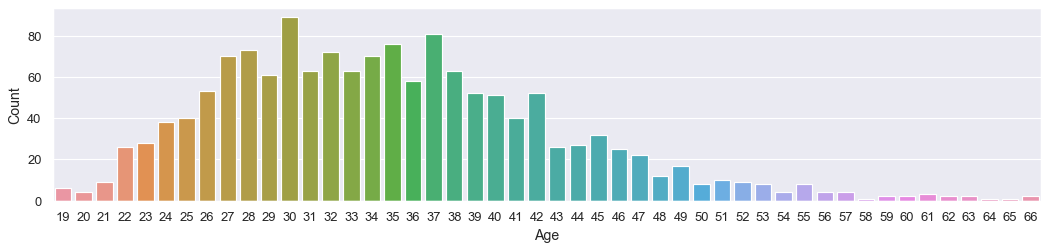

In [977]:
# Age distribution overall, visualized as bar plot
plt.subplots(figsize=(15, 3))
age_barplot = sns.barplot(x = 'Age', y = 'Count', data = q1_by_age)

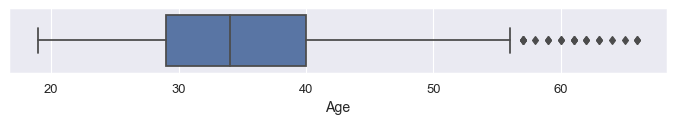

In [978]:
# Age distribution overall, visualized as box plot
plt.subplots(figsize=(10, 1))
age_boxplot = sns.boxplot(x=q1.Age)
age_boxplot.xaxis.grid(True)

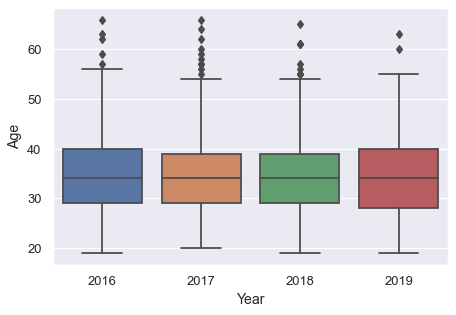

In [979]:
# Age distribution by year, visualized as box plot
age_boxplot_2 = sns.boxplot(x=q1.Year, y=q1.Age)
age_boxplot_2.yaxis.grid(True)

### Q2: Gender distribution

In [980]:
# capitalize answers to group them properly
q2.Gender = np.where((q2.Gender != 'n/a'), q2.Gender.str.capitalize(), q2.Gender)

In [981]:
# Change non-"Male" and non-"Female" to "Other"
q2.Gender = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female') & (q2.Gender != 'n/a')), 'Other', q2.Gender)

In [982]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name='Count')
q2_by_year['%'] = append_count_in_percent(q2_by_year)
q2_by_year

,Year,Count,%
0,2016,248,16.859279
1,2017,595,40.448674
2,2018,346,23.521414
3,2019,282,19.170632


In [983]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name='Count') 
q2_by_gender['%'] = append_count_in_percent(q2_by_gender)
q2_by_gender

,Gender,Count,%
0,Female,401,27.260367
1,Male,999,67.912984
2,Other,59,4.010877
3,n/a,12,0.815772


In [984]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name='Count') 
q2_by_gender_and_year['%'] = append_count_in_percent_by_group(q2_by_gender_and_year, 'Year')
q2_by_gender_and_year

,Gender,Year,Count,%
0,Female,2016,60,24.193548
1,Female,2017,166,27.899160
2,Female,2018,102,29.479769
3,Female,2019,73,25.886525
4,Male,2016,182,73.387097
5,Male,2017,407,68.403361
6,Male,2018,222,64.161850
7,Male,2019,188,66.666667
8,Other,2016,4,1.612903
9,Other,2017,18,3.025210


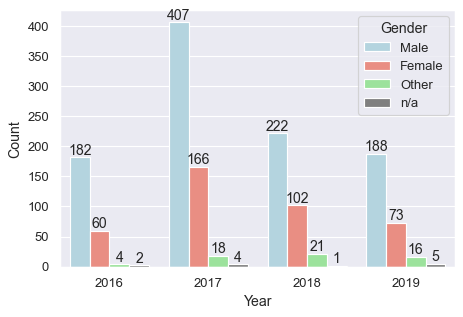

In [985]:
# Gender distribution by year, visualized
gender_barplot = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, \
    hue_order=['Male', 'Female', 'Other', 'n/a'], palette=['lightblue', 'salmon', 'lightgreen', 'grey'])

# add labels to bars
for container in gender_barplot.containers:
    gender_barplot.bar_label(container)

### Q3: Origin distribution

In [986]:
# Participation by country
q3_by_country = q3.groupby('Country').size().reset_index(name='Count')
q3_by_country['%'] = append_count_in_percent(q3_by_country)
print('Number of countries: ' + str(len(q3_by_country.index)))

Number of countries: 55


In [987]:
# Top 10 country participation
q3_by_country_top_10 = q3_by_country.nlargest(10, 'Count')
q3_by_country_top_10.sort_values('Count', ascending = False)

,Country,Count,%
53,United States of America,1010,68.660775
52,United Kingdom,123,8.361659
8,Canada,37,2.515296
18,Germany,34,2.311353
24,India,25,1.699524
33,Netherlands,24,1.631543
17,France,20,1.359619
6,Brazil,18,1.223657
39,Portugal,18,1.223657
47,Spain,16,1.087695


### Q5: Self-employment ratio

In [988]:
# Change: 1 -> Yes, 0 -> No
q5['Self_employed'] = np.where((q5.Self_employed == '1'), 'Yes', q5.Self_employed)
q5['Self_employed'] = np.where((q5.Self_employed == '0'), 'No', q5.Self_employed)

In [989]:
# Group and count by answer
q5_by_answer = q5.groupby('Self_employed').size().reset_index(name='Count')
q5_by_answer['%'] = append_count_in_percent(q5_by_answer)
q5_by_answer

,Self_employed,Count,%
0,No,1471,100.0


## Hypotheses

### Die Häufigkeit psychischer Erkrankungen nimmt jährlich zu

In [990]:
# Standardize answers
q33['Has_disorder'] = np.where((q33.Has_disorder == 'Maybe'), 'Possibly', q33.Has_disorder)

In [991]:
# Group and count by Answer and Year
has_disorder_by_year = q33.groupby(['Has_disorder', 'Year']).size().reset_index(name='Count')
has_disorder_by_year['%'] = append_count_in_percent_by_group(has_disorder_by_year, 'Year')
has_disorder_by_year

,Has_disorder,Year,Count,%
0,Don't Know,2017,55,9.243697
1,Don't Know,2018,23,6.647399
2,Don't Know,2019,20,7.092199
3,No,2016,95,38.306452
4,No,2017,172,28.907563
5,No,2018,95,27.456647
6,No,2019,83,29.432624
7,Possibly,2016,56,22.580645
8,Possibly,2017,115,19.327731
9,Possibly,2018,71,20.520231


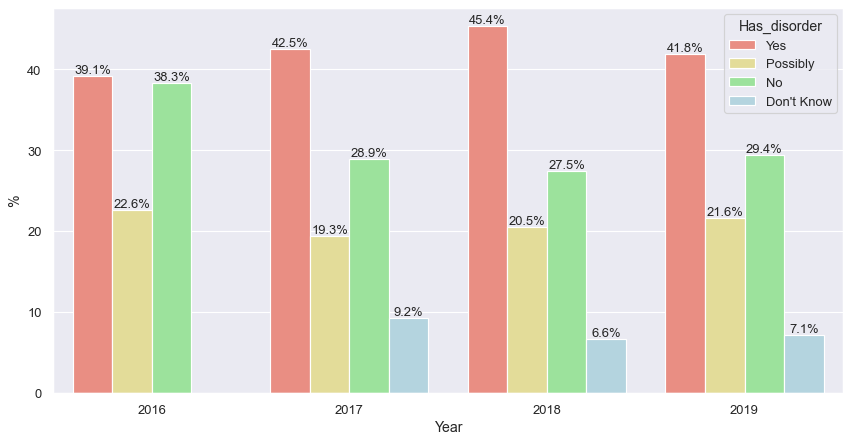

In [992]:
# Currently affected by a mental disorder, visualized
plt.subplots(figsize=(12, 6))
has_disorder_barplot = sns.barplot(x = 'Year', y = '%', hue = 'Has_disorder', data = has_disorder_by_year, \
    hue_order=['Yes', 'Possibly', 'No', 'Don\'t Know'], palette=['salmon', 'khaki', 'lightgreen','lightblue'])
for container in has_disorder_barplot.containers:
    has_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

### Frauen sind häufiger von psychischen Erkrankungen betroffen als Männer

In [993]:
# Mental disorder by gender
q2_q33 = pd.merge(q2, q33, on='UserID', how='inner')
disorder_by_gender = q2_q33.groupby(['Gender', 'Has_disorder']).size().reset_index(name='Count')
disorder_by_gender['%'] = append_count_in_percent_by_group(disorder_by_gender, 'Gender')
disorder_by_gender

,Gender,Has_disorder,Count,%
0,Female,Don't Know,20,4.987531
1,Female,No,91,22.693267
2,Female,Possibly,72,17.955112
3,Female,Yes,218,54.364090
4,Male,Don't Know,75,7.507508
5,Male,No,341,34.134134
6,Male,Possibly,217,21.721722
7,Male,Yes,366,36.636637
8,Other,Don't Know,2,3.389831
9,Other,No,9,15.254237


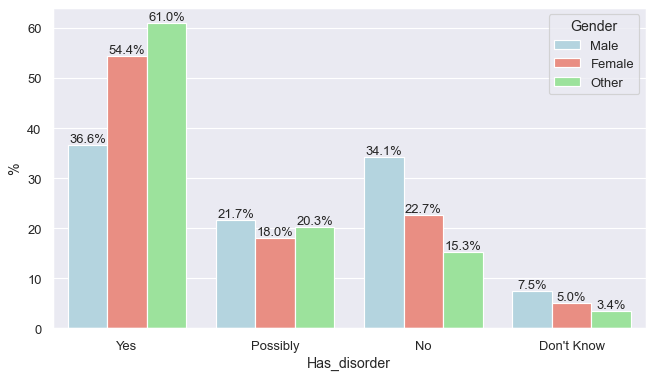

In [994]:
# Status of mental disorder by gender, visualized
plt.subplots(figsize=(9, 5))
gender_disorder_barplot = sns.barplot(x = 'Has_disorder', y = '%', hue = 'Gender', data = disorder_by_gender, \
    order=['Yes', 'Possibly', 'No', 'Don\'t Know'], hue_order=['Male', 'Female', 'Other'], palette=['lightblue', 'salmon', 'lightgreen'])

for container in gender_disorder_barplot.containers:
   gender_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

### Selbstständige sind häufiger von psychischen Erkrankungen betroffen

In [995]:
## Self-employed and had metal disorder
q5_q32 = pd.merge(q5, q32, on='UserID', how='inner')
q5_q32
#Add Count and %
self_employed_had_mental_disorder = q5_q32.groupby(['Self_employed', 'Had_disorder']).size().reset_index(name='Count')
temp = self_employed_had_mental_disorder['Count'].sum()
self_employed_had_mental_disorder['%'] = (self_employed_had_mental_disorder['Count'] / temp)*100
self_employed_had_mental_disorder


,Self_employed,Had_disorder,Count,%
0,No,Don't Know,93,6.322230
1,No,Maybe,39,2.651258
2,No,No,440,29.911625
3,No,Possibly,224,15.227736
4,No,Yes,665,45.207342
5,No,n/a,10,0.679810


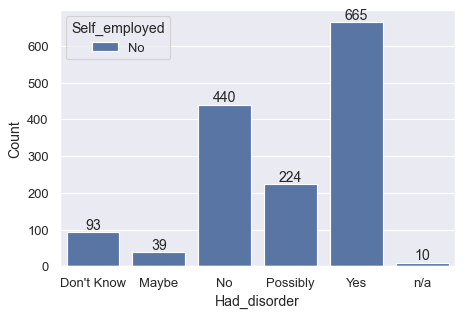

In [996]:
#self employed and had mental disorder, visualized
ax = sns.barplot(x= 'Had_disorder', y='Count', hue='Self_employed', data= self_employed_had_mental_disorder)

#add labels to bars
for container in ax.containers:
    ax.bar_label(container)

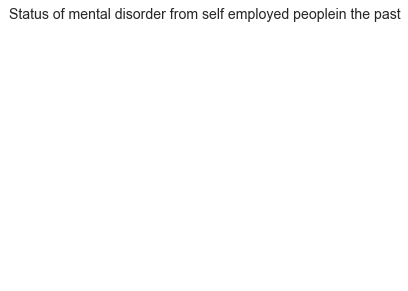

In [997]:
#show self employed 
self_employed = self_employed_had_mental_disorder.drop(self_employed_had_mental_disorder[self_employed_had_mental_disorder.Self_employed == 'No'].index)
plt.pie(self_employed['%'],labels=self_employed['Had_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Status of mental disorder from self employed peoplein the past')
plt.show()

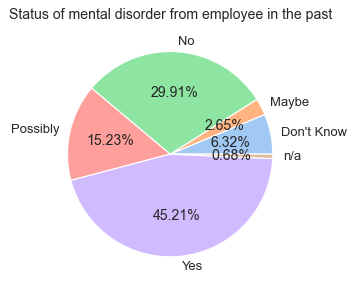

In [998]:
#show employee
employee = self_employed_had_mental_disorder.drop(self_employed_had_mental_disorder[self_employed_had_mental_disorder.Self_employed == 'Yes'].index)
plt.pie(employee['%'],labels=employee['Had_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Status of mental disorder from employee in the past')
plt.show()

In [999]:
## Self-employed and had metal disorder
q5_q33 = pd.merge(q5, q33, on='UserID', how='inner')
#Add Count and % Column
self_employed_has_mental_disorder = q5_q33.groupby(['Self_employed', 'Has_disorder']).size().reset_index(name='Count')
self_employed_has_mental_disorder['%'] = append_count_in_percent_by_group(self_employed_has_mental_disorder, 'Self_employed')
self_employed_has_mental_disorder

,Self_employed,Has_disorder,Count,%
0,No,Don't Know,98,6.662135
1,No,No,445,30.251530
2,No,Possibly,303,20.598232
3,No,Yes,625,42.488103


Balkendiagramm aus den Piecharts machen 
Vielleicht nochmal heraussuchen, ob man sehen kann, dass sie früher schon in der Tech industry gearbeitet haben

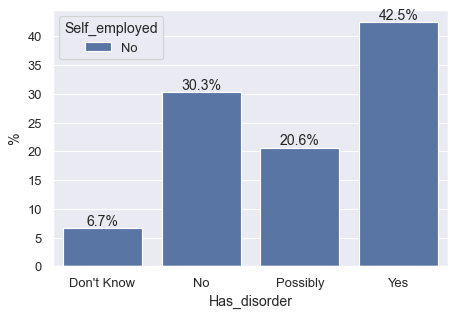

In [1000]:
#show self employed that has mental disorder
ax = sns.barplot(x='Has_disorder', y='%', hue='Self_employed', data= self_employed_has_mental_disorder)

#add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
# plt.pie(self_employed['%'],labels=self_employed['Has_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
# plt.title('Status of mental disorder from self employed people right now')
# plt.show()

In [1001]:
#people who had and still have a mental disorder
duplicates = pd.merge(q32, q33, on="UserID", how='inner')


### Menschen im Home-Office sind häufiger von psychischen Erkrankungen betroffen

In [1002]:
home_office = q118.groupby('Remote_work').size().reset_index(name='Count')
home_office['%'] = append_count_in_percent(home_office)
home_office

,Remote_work,Count,%
0,Always,16,6.451613
1,Never,98,39.516129
2,Sometimes,134,54.032258


In [1003]:
q33_q118 = pd.merge(q33, q118, on='UserID', how='inner')
home_office_has_mental_disorder = q33_q118.groupby(['Remote_work', 'Has_disorder']).size().reset_index(name='Count')
home_office_has_mental_disorder['%'] = append_count_in_percent_by_group(home_office_has_mental_disorder, 'Remote_work')
home_office_has_mental_disorder

,Remote_work,Has_disorder,Count,%
0,Always,No,9,56.250000
1,Always,Possibly,2,12.500000
2,Always,Yes,5,31.250000
3,Never,No,38,38.775510
4,Never,Possibly,27,27.551020
5,Never,Yes,33,33.673469
6,Sometimes,No,48,35.820896
7,Sometimes,Possibly,27,20.149254
8,Sometimes,Yes,59,44.029851


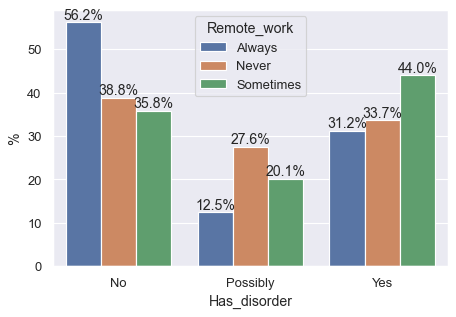

In [1004]:
ax = sns.barplot(x='Has_disorder', y='%', hue='Remote_work', data=home_office_has_mental_disorder)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

### Mentale Gesundheit ist immer noch ein Tabu Thema

12 Would you bring up a mental health issue with a potential employer in an interview?
18 Would you feel comfortable discussing a mental health issue with your coworkers?
19 Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
29 Would you be willing to bring up a physical health issue with a potential employer in an interview?
30 How willing would you be to share with friends and family that you have a mental illness?
57 Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
64 Overall, how much importance does your employer place on physical health?
65 Overall, how much importance does your employer place on mental health?

In [1005]:
# Um das besser vergleichen zu können habe ich 'Somewhat not open' und 'Somewhat open' zu maybe zusammengefasst
q30['Comfortable'] = np.where((q30.Comfortable == 'Not open at all'), 'No', q30.Comfortable)
q30['Comfortable'] = np.where((q30.Comfortable == 'Very open'), 'Yes', q30.Comfortable)
q30['Comfortable'] = np.where((q30.Comfortable == 'Somewhat not open'), 'Maybe', q30.Comfortable)
q30['Comfortable'] = np.where((q30.Comfortable == 'Somewhat open'), 'Maybe', q30.Comfortable)
q30['Comfortable'] = np.where((q30.Comfortable == 'Neutral'), 'Maybe', q30.Comfortable)

In [1006]:
# Wer würde mit seinen Vorgesetzten oder Arbeitskollegen über seine mentale Gesundheit sprechen?
discuss_coworkers = q18.groupby('Comfortable').size().reset_index(name='Coworker')
discuss_supervisor = q19.groupby('Comfortable').size().reset_index(name='Supervisor')
family_and_friends = q30.groupby('Comfortable').size().reset_index(name='Family_and_friends')
discuss = pd.merge(discuss_coworkers,discuss_supervisor, on='Comfortable', how='inner')
discuss = pd.merge(discuss,family_and_friends, on='Comfortable', how='inner')
discuss = pd.DataFrame(discuss, columns=['Comfortable', 'Coworker', 'Supervisor', 'Family_and_friends'])
family_and_friends

,Comfortable,Family_and_friends
0,Maybe,493
1,No,216
2,Not applicable to me (I do not have a mental illness),20
3,Yes,742


In [1007]:
discuss.Coworker.sum()

1471

In [1008]:
discuss.Supervisor.sum()

1471

In [1009]:
discuss.Family_and_friends.sum()

1451

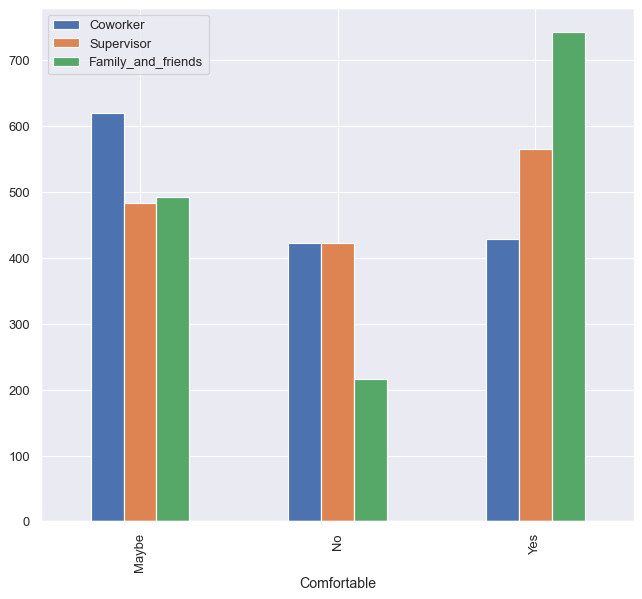

In [1010]:
# Mentale Probleme Diagramm 1
discuss.plot(x='Comfortable', y=['Coworker', 'Supervisor', 'Family_and_friends'], kind='bar', figsize=(9,8))
plt.show()

In [1020]:
#Mentale vs. physische Gesundheit in einem Interview
mental_interview = q12.groupby('Bring_up_to_interview').size().reset_index(name='Mental')
mental_interview['Mental_in_%'] = append_count_in_percent(mental_interview, count='Mental')
physical_interview = q29.groupby('Bring_up_to_interview').size().reset_index(name='Physical')
physical_interview['Physical_in_%'] = append_count_in_percent(physical_interview, count='Physical')
interview = pd.merge(physical_interview, mental_interview, on='Bring_up_to_interview', how='inner')
interview = pd.DataFrame(interview, columns=['Bring_up_to_interview', 'Physical','Physical_in_%', 'Mental', 'Mental_in_%'])
interview

,Bring_up_to_interview,Physical,Physical_in_%,Mental,Mental_in_%
0,Maybe,597,40.584636,388,26.376615
1,No,538,36.573759,1008,68.524813
2,Yes,336,22.841604,75,5.098572


In [1012]:
interview.Mental.sum()

1471

In [1013]:
interview.Physical.sum()

1471

In [1023]:
interview

,Bring_up_to_interview,Physical,Physical_in_%,Mental,Mental_in_%
0,Maybe,597,40.584636,388,26.376615
1,No,538,36.573759,1008,68.524813
2,Yes,336,22.841604,75,5.098572


AttributeError: 'Rectangle' object has no property 'index'

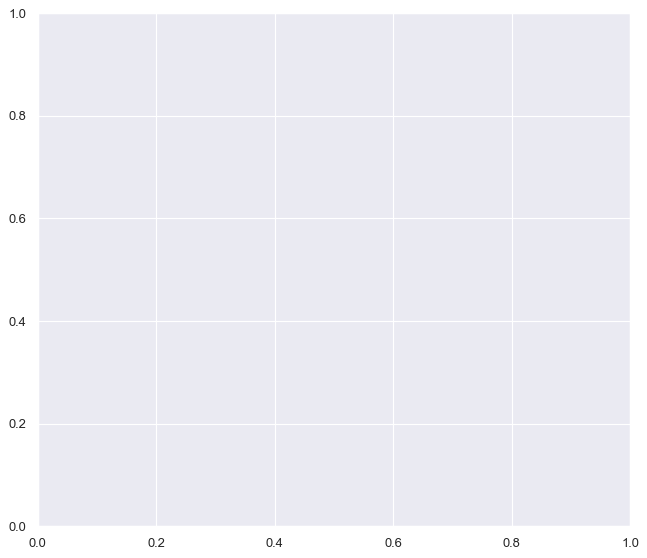

In [1024]:
#Diagram 2
interview.plot(x='Bring_up_to_interview', y=['Physical', 'Mental'], kind='bar', figsize=(9,8), index=)

In [1016]:
q57['Comfortable'] = np.where((q57.Comfortable == 'Same level of comfort for each'), 'Same comfort-level', q57.Comfortable)
physical_or_mental = q57.groupby('Comfortable').size().reset_index(name='Count')
physical_or_mental

,Comfortable,Count
0,Mental health,18
1,Physical health,831
2,Same comfort-level,374


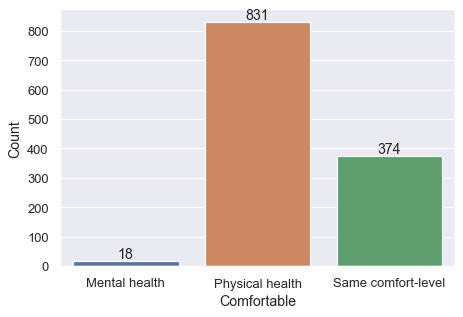

In [1017]:
ax = sns.barplot(x='Comfortable', y='Count', data=physical_or_mental)

for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='Importance'>

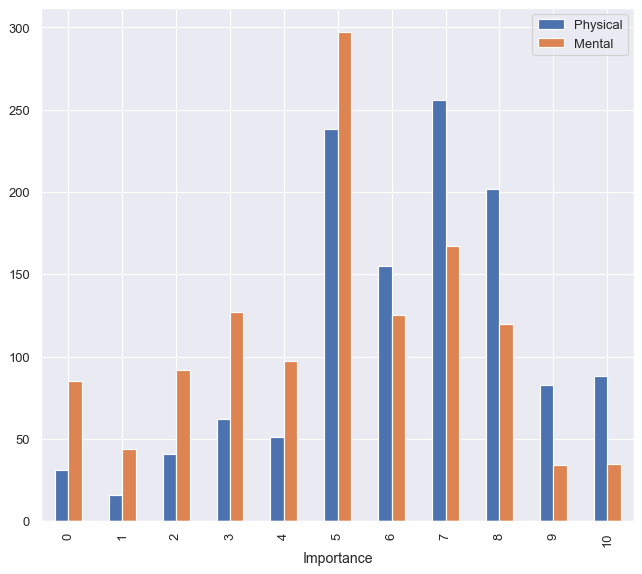

In [1018]:
q64.Importance = q64.Importance.astype(int)
importance_physical = q64.groupby('Importance').size().reset_index(name='Physical')

q65.Importance = q65.Importance.astype(int)
importance_mental = q65.groupby('Importance').size().reset_index(name='Mental')

importance = pd.merge(importance_physical, importance_mental, on='Importance', how='inner')

importance = pd.DataFrame(importance, columns=['Importance', 'Physical', 'Mental'])
importance.plot(x='Importance', y=['Physical', 'Mental'], kind='bar', figsize=(9, 8))

# ax = sns.barplot(x='Importance', y='Count', data=importance_physical)
#
# for container in ax.containers:
#     ax.bar_label(container)